In [3]:
import pandas as pd
import  numpy as np
import seaborn as sns

In [4]:
marks = pd.read_csv('student_marks.csv')

In [5]:
marks.isnull()

,Roll No,Name,Subject 1,Subject 2,Subject 3,Subject 4,Attendance
0,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False
999,False,False,False,False,False,False,False


In [6]:
marks.isnull().sum()

Roll No       0
Name          0
Subject 1     0
Subject 2     0
Subject 3     1
Subject 4     1
Attendance    0
dtype: int64

In [7]:
marks.fillna({'Subject 3':marks['Subject 3'].mean()}, inplace = True)

In [8]:
marks.dropna(inplace = True)

In [9]:
numeric_columns = marks.select_dtypes(include=['number']).columns
marks[numeric_columns] = marks[numeric_columns].clip(lower=0)

In [10]:
marks.head()

,Roll No,Name,Subject 1,Subject 2,Subject 3,Subject 4,Attendance
0,1,Student_1,100,62,73.00,92.0,96
2,3,Student_3,100,88,71.00,99.0,0
3,4,Student_4,72,99,79.89,84.0,86
4,5,Student_5,97,70,84.00,70.0,86
5,6,Student_6,98,76,89.00,92.0,82


In [11]:
marks.drop_duplicates(inplace=True)

In [12]:
marks.shape

(999, 7)

In [13]:
numeric_columns = numeric_columns.drop('Roll No')

In [14]:
import matplotlib.pyplot as plt

In [15]:
marks = marks[marks['Attendance']>0]

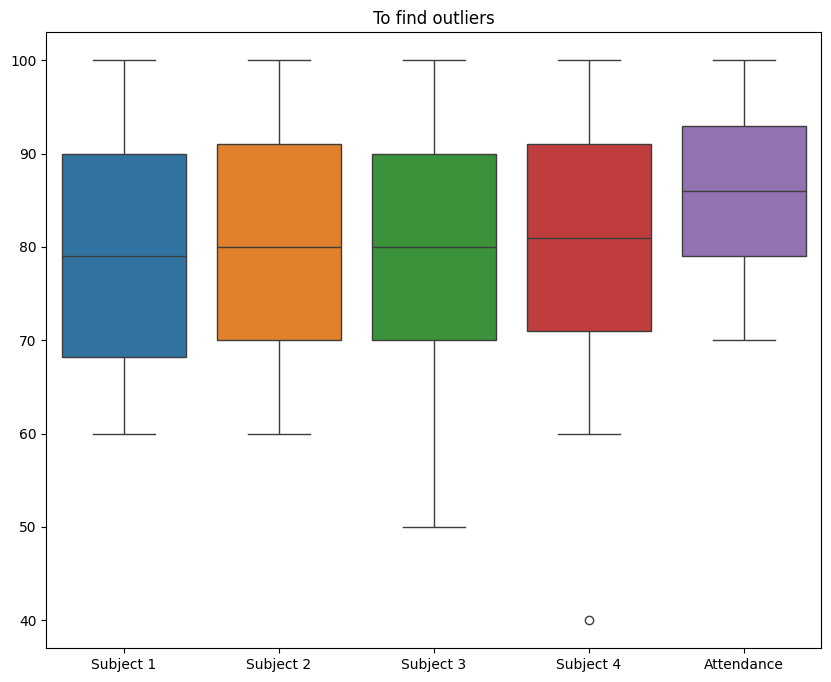

In [16]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = marks[numeric_columns])
# plt.xticks(rotation=45)
plt.title('To find outliers')
plt.show()

In [17]:
from scipy import stats

def outliers_iqr(data, column, threshold = 1.5):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - iqr*threshold
    upper_bound = q3 + iqr*threshold
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    if not outliers.empty:
        print(f'Outliers in {column}:')
        print(outliers[['Roll No', 'Name', column]])
    else:
        print('No outliers found!')

def outlier_z(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return z_scores > threshold

for col in numeric_columns:
    outliers_iqr(marks, col)

No outliers found!
No outliers found!
No outliers found!
Outliers in Subject 4:
    Roll No        Name  Subject 4
48       49  Student_49       40.0
No outliers found!


In [18]:
for col in numeric_columns:
    lower = marks[col].quantile(0.01)
    upper = marks[col].quantile(0.99)
    marks[col] = marks[col].clip(lower, upper)

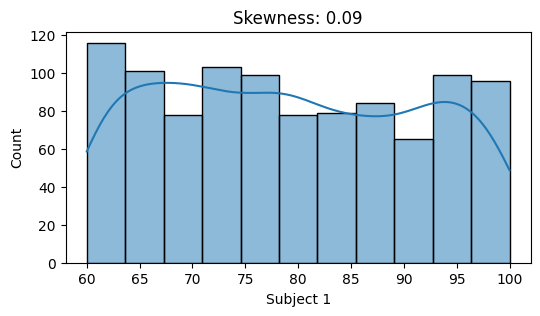

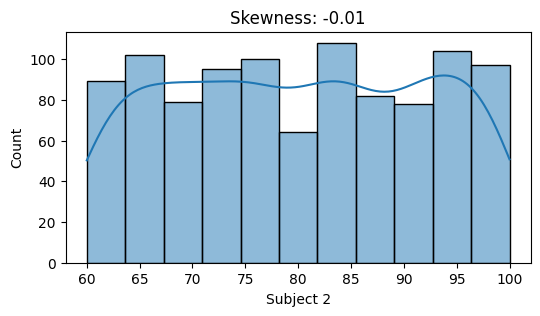

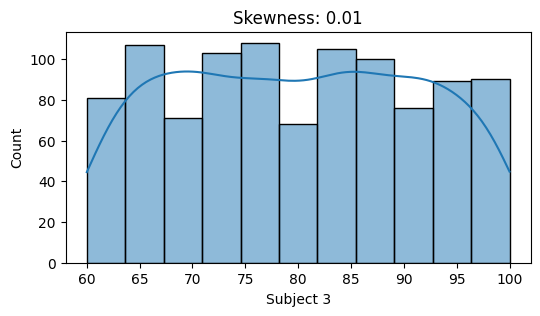

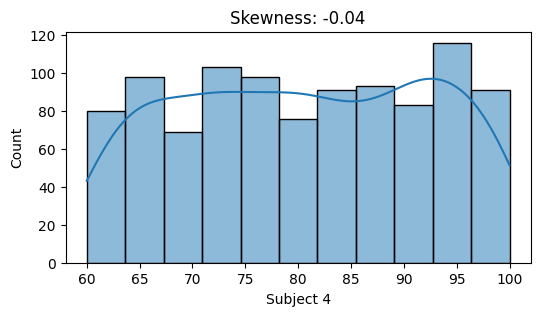

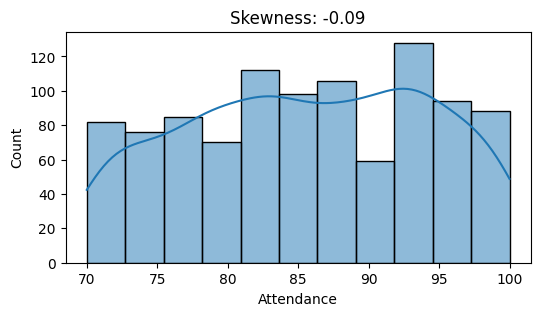

In [19]:
from scipy.stats import skew
for col in numeric_columns:
    original_skew = skew(marks[col])
    plt.figure(figsize=(6,3))
    # plt.subplot(1,2,1)
    sns.histplot(data=marks[col], kde=True)
    plt.title(f'Skewness: {original_skew:.2f}')

In [20]:
marks['Transformed_attendance'] = np.sqrt(marks['Attendance'])

In [21]:
marks.head()

,Roll No,Name,Subject 1,Subject 2,Subject 3,Subject 4,Attendance,Transformed_attendance
0,1,Student_1,100,62,73.00,92.0,96,9.797959
3,4,Student_4,72,99,79.89,84.0,86,9.273618
4,5,Student_5,97,70,84.00,70.0,86,9.273618
5,6,Student_6,98,76,89.00,92.0,82,9.055385
6,7,Student_7,61,64,97.00,98.0,83,9.110434


<Axes: title={'center': 'Attendace Skewness: -0.16'}, xlabel='Transformed_attendance', ylabel='Count'>

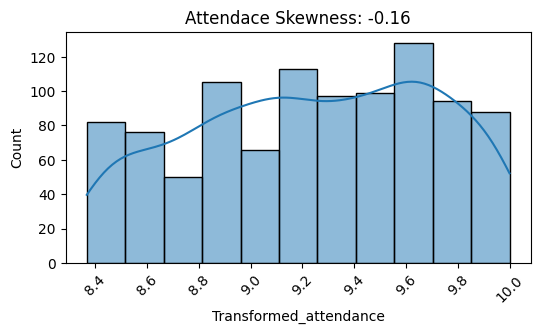

In [22]:
new_skew = skew(marks['Transformed_attendance'])
plt.figure(figsize=(6,3))
plt.xticks(rotation=45)
plt.title(f'Attendace Skewness: {new_skew:.2f}')
sns.histplot(marks['Transformed_attendance'], kde=True)

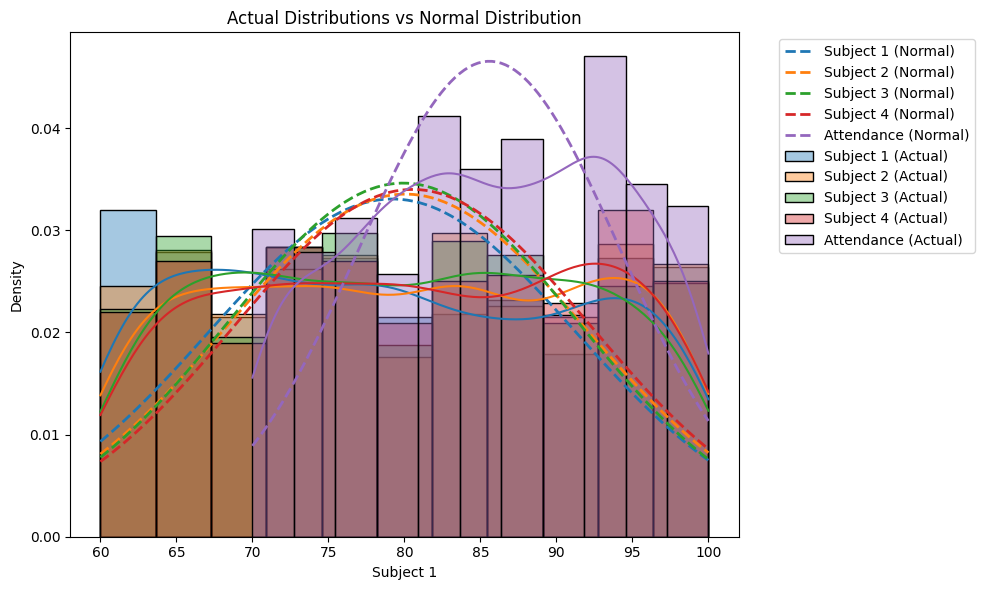

In [24]:
from scipy.stats import norm
plt.figure(figsize=(10,6))

for col in numeric_columns:
    data = marks[col].dropna()  # Handle missing values
    mean, std = data.mean(), data.std()
    
    # Create normal distribution curve
    x = np.linspace(data.min(), data.max(), 100)
    y = norm.pdf(x, mean, std)
    
    # Plot with proper labels
    sns.histplot(data, kde=True, stat='density', alpha=0.4, label=f'{col} (Actual)')
    plt.plot(x, y, '--', lw=2, label=f'{col} (Normal)')

plt.title('Actual Distributions vs Normal Distribution')
plt.legend(bbox_to_anchor=(1.05, 1))  # Now has labels to display
plt.tight_layout()
plt.show()

In [27]:
print(numeric_columns)

Index(['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4'], dtype='object')


In [26]:
numeric_columns = numeric_columns.drop('Attendance')